# Mosaic velocities from the same sensor / pass direction

Expected output:
+ vel_alos2_asc.h5
+ vel_s1_asc.h5
+ vel_s1_dsc.h5

In [3]:
%matplotlib inline
import os
import numpy as np
import platform
from cartopy import crs as ccrs
from matplotlib import pyplot as plt
from mintpy.utils import readfile, writefile, plot as pp, utils as ut
from mintpy.cli import image_stitch, mask, save_kmz, view
plt.rcParams.update({'font.size': 12})

# project dir
if platform.system() == 'Linux':
    proj_dir = os.path.expanduser('~/data/jinsha')          # on linux server
else:
    proj_dir = os.path.expanduser('~/data/china/jinsha')    # on macos/windows laptop

# working dir
os.chdir(proj_dir)
print('Go to directory:', proj_dir)

dem_file = os.path.join(proj_dir, 'DEM/copernicus.h5')

# datasets
ds_names = [
    ['alos2_a147_f510', 'alos2_a147_f520', 'alos2_a148'],
    ['s1_a128', 's1_a026', 's1_a099', 's1_a172'],
    ['s1_d062', 's1_d135', 's1_d033', 's1_d106'],
][0]

# mosaic file suffix
dparts = ds_names[0].split('_')
suffix = f'{dparts[0]}_{dparts[1][0]}sc'
print(f'output mosaic file suffix: {suffix}')

Go to directory: /Users/yunjunz/data/china/jinsha
output mosaic file suffix: alos2_asc


## 1. Plot single track/frame velocity

for quality checking.

------------------------------1/3: alos2_a147_f510
run view.py in MintPy version 1.5.3.post32, date 2024-03-30
input file is velocity file: /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity.h5 in float32 format
file size in y/x: (2600, 3090)
input dataset: "['velocity']"
turning glob search OFF for velocity file
num of datasets in file geo_velocity.h5: 5
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 3090, 2600)
subset coverage in y/x: (0, 0, 3090, 2600)
data   coverage in lat/lon: (102.07402995296765, 26.368091215919055, 102.9107480054681, 25.636053593077357)
subset coverage in lat/lon: (102.07402995296765, 26.368091215919055, 102.9107480054681, 25.636053593077357)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: jet
initiate cartopy map projection: PlateCarree
figure title: geo_velocity
figure size : [8.6, 6.0]
read m

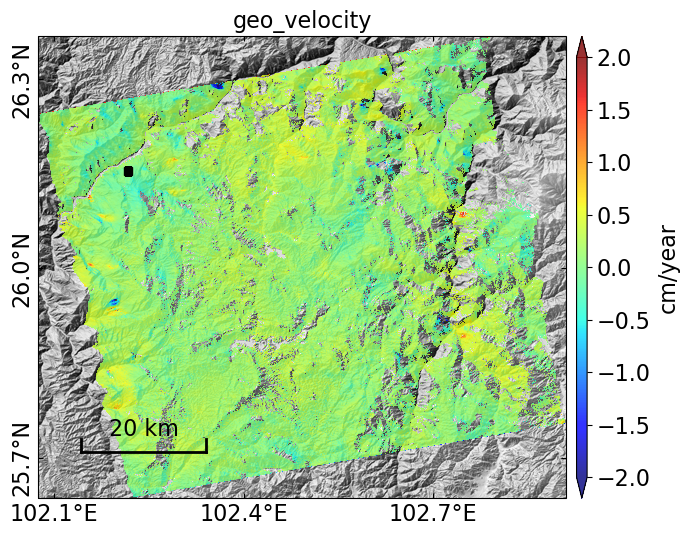

------------------------------2/3: alos2_a147_f520
run view.py in MintPy version 1.5.3.post32, date 2024-03-30
input file is velocity file: /Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity.h5 in float32 format
file size in y/x: (2777, 2723)
input dataset: "['velocity']"
turning glob search OFF for velocity file
num of datasets in file geo_velocity.h5: 5
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 2723, 2777)
subset coverage in y/x: (0, 0, 2723, 2777)
data   coverage in lat/lon: (102.64701965135139, 26.971770508273895, 103.4713760772733, 26.2448902296297)
subset coverage in lat/lon: (102.64701965135139, 26.971770508273895, 103.4713760772733, 26.2448902296297)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: jet
initiate cartopy map projection: PlateCarree
figure title: geo_velocity
figure size : [8.5, 6.0]
read mask 

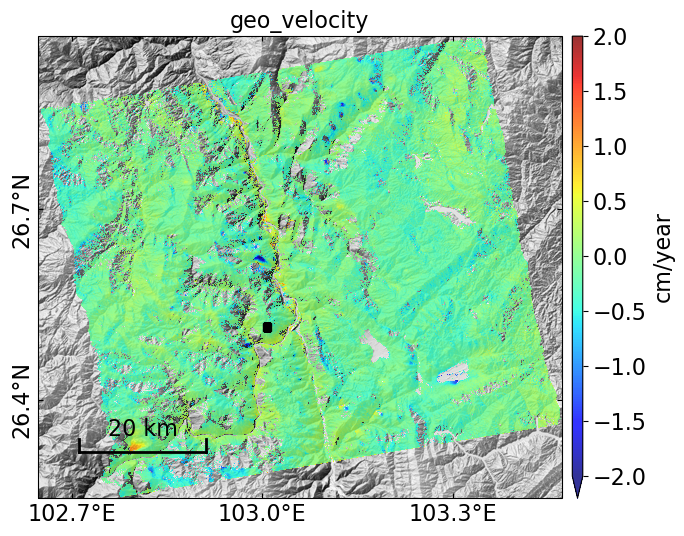

------------------------------3/3: alos2_a148
run view.py in MintPy version 1.5.3.post32, date 2024-03-30
input file is velocity file: /Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_velocity.h5 in float32 format
file size in y/x: (5143, 3350)
input dataset: "['velocity']"
turning glob search OFF for velocity file
num of datasets in file geo_velocity.h5: 5
datasets to exclude (0):
[]
datasets to display (1):
['velocity']
data   coverage in y/x: (0, 0, 3350, 5143)
subset coverage in y/x: (0, 0, 3350, 5143)
data   coverage in lat/lon: (101.56272715597845, 27.069181220914707, 102.44327843821819, 25.85508072793723)
subset coverage in lat/lon: (101.56272715597845, 27.069181220914707, 102.44327843821819, 25.85508072793723)
------------------------------------------------------------------------
area exceed 2000 pixels, turn off default DEM contour display
colormap: jet
initiate cartopy map projection: PlateCarree
figure title: geo_velocity
figure size : [6.0, 6.6]
read mask from f

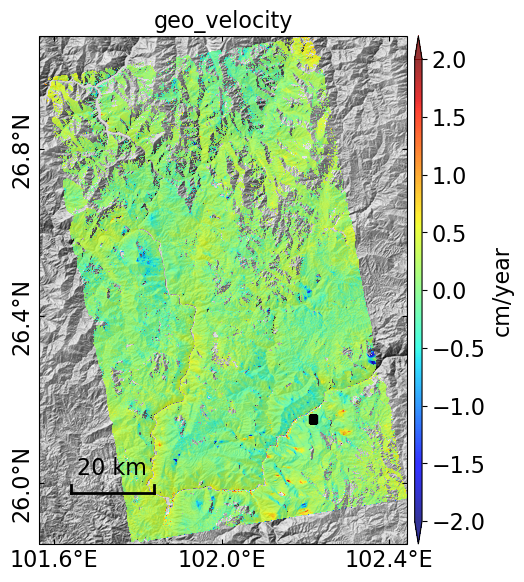

In [2]:
for i, ds_name in enumerate(ds_names):
    # file paths
    vel_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocity.h5')
    msk_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_maskTempCoh.h5')
    png_file = os.path.join(proj_dir, f'velocity/pic/vel_{ds_name}.png')
    print('-'*30 + f'{i+1}/{len(ds_names)}: {ds_name}')

    # call view.py
    cmd = f'{vel_file} velocity --mask {msk_file} --dem {dem_file} '
    cmd += '-v -2 2 --lalo-label --ylabel-rot 90 '
    #cmd += f'--notitle --noverbose -o {png_file} '
    view.main(cmd.split())

## 2. Mosaic all velocities

Output: ALOS2_ASC, S1_ASC, S1_DSC

### a. Mask

In [6]:
for i, ds_name in enumerate(ds_names):
    # file paths
    vel_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocity.h5')
    msk_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_maskTempCoh.h5')
    out_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocity_msk.h5')
    print('-'*30 + f'{i+1}/{len(ds_names)}: {ds_name}')

    # run
    cmd = f'{vel_file} --mask {msk_file} -o {out_file}'
    if ut.run_or_skip(out_file, in_file=[vel_file, msk_file]) == 'run':
        mask.main(cmd.split())

------------------------------1/3: alos2_a147_f510
['/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity_msk.h5'] exists and is newer than ['/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity.h5', '/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_maskTempCoh.h5'] --> skip.
------------------------------2/3: alos2_a147_f520
['/Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity_msk.h5'] exists and is newer than ['/Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity.h5', '/Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_maskTempCoh.h5'] --> skip.
------------------------------3/3: alos2_a148
['/Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_velocity_msk.h5'] exists and is newer than ['/Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_velocity.h5', '/Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_maskTempCoh.h5'] --> skip.


### b. Mosaic

files to be stitched: ['/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity_msk.h5', '/Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity_msk.h5', '/Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_velocity_msk.h5']
datasets to be stitched: ['velocity']
##################################################
read velocity from file: /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocity_msk.h5
------------------------------
read data from file: /Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocity_msk.h5
stitching ...
file 1: X_STEP - 0.000270782541262279, Y_STEP - -0.00028155293186219143
file 2: X_STEP - 0.00030273831286151706, Y_STEP - -0.0002617501903652136
rescale the 2nd matrix into the same spatial resolution as the 1st one ...


/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


grab corners of input matrices
calculate corners of output matrix
estimate difference in the overlapping area
average offset between two matrices in the common area: -0.0014029617209888052
offset all pixel values in the 2nd matrix by -0.0014029617209888052 
create output metadata and matrix in shape of (4745, 5161)
update LENGTH/WIDTH: 4745/5161
update Y/X_FIRST: 26.971770508273895/102.07402995296765
update REF_Y/X: 2904/528
plot stitching & shifting result ...
figure size : [11.4, 8.4]
save figure to file: /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc_01.png
------------------------------
read data from file: /Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_velocity_msk.h5
stitching ...
file 1: X_STEP - 0.000270782541262279, Y_STEP - -0.00028155293186219143
file 2: X_STEP - 0.00026285112902678956, Y_STEP - -0.00023606853839733174
rescale the 2nd matrix into the same spatial resolution as the 1st one ...


/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


grab corners of input matrices
calculate corners of output matrix
estimate difference in the overlapping area
average offset between two matrices in the common area: -0.0002450280266513446
offset all pixel values in the 2nd matrix by -0.0002450280266513446 
create output metadata and matrix in shape of (5091, 7050)
update LENGTH/WIDTH: 5091/7050
update Y/X_FIRST: 27.069181220914707/101.56272715597845
update REF_Y/X: 3250/2417
plot stitching & shifting result ...
figure size : [14.0, 8.1]
save figure to file: /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc_12.png
##################################################
delete exsited file: /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5
create HDF5 file: /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5 with w mode
create dataset /velocity of float32    in size of (5091, 7050)         with compression=None
finished writing to /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5
showing ...


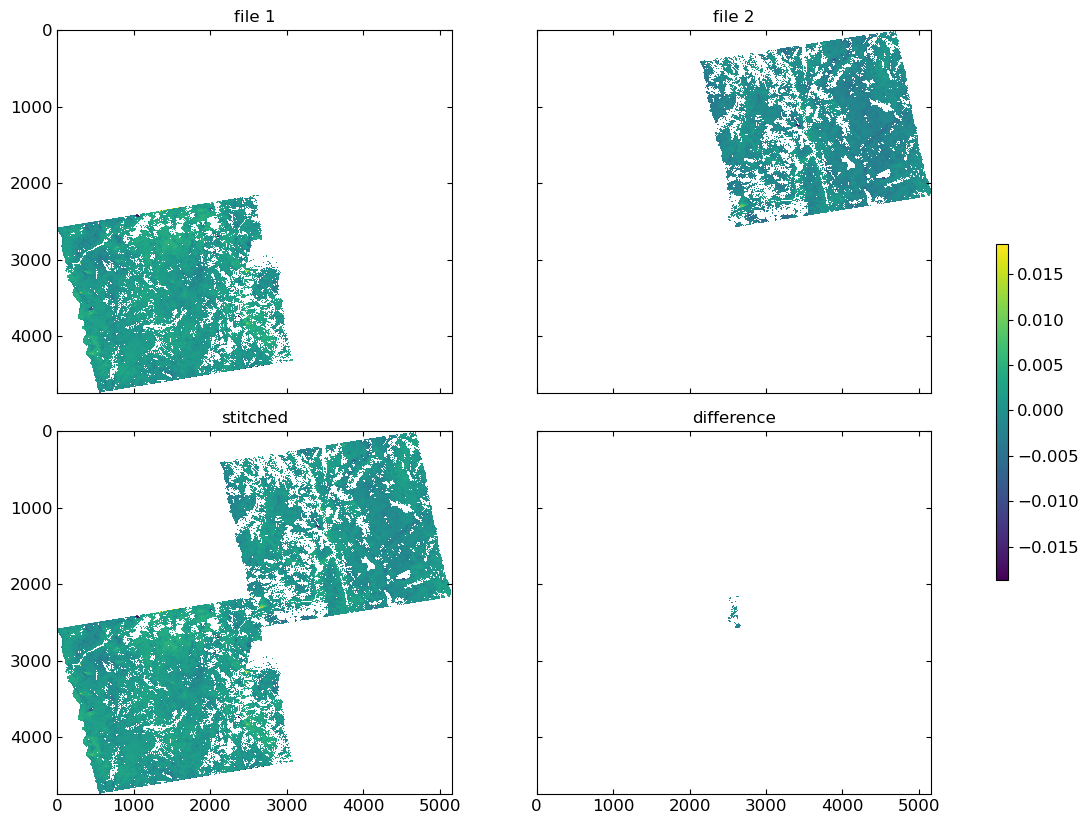

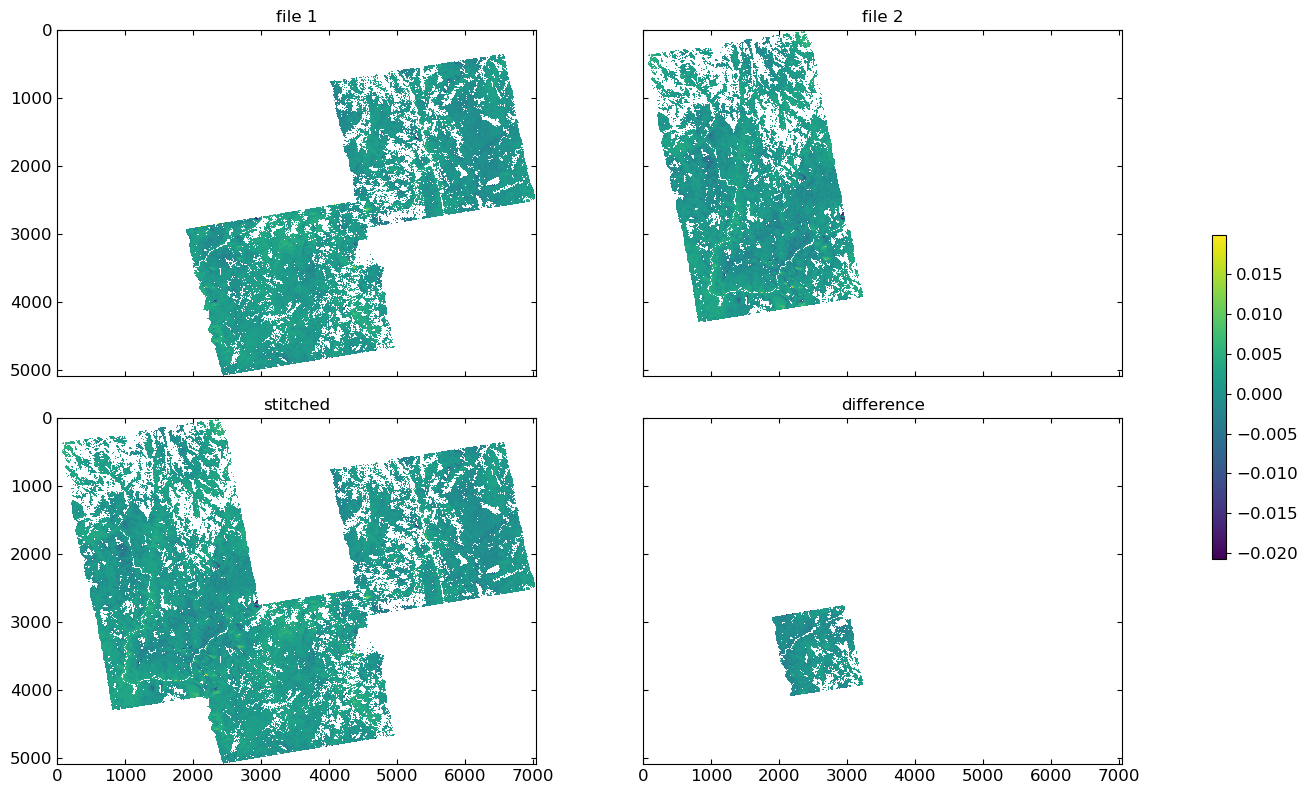

In [7]:
# file paths
vel_files = [os.path.join(proj_dir, x, 'mintpy/geo/geo_velocity_msk.h5') for x in ds_names]
out_file = os.path.join(proj_dir, f'velocity/vel_{suffix}.h5')

# run
cmd = ' '.join(x for x in vel_files) + f' -o {out_file}'
if ut.run_or_skip(out_file, in_file=vel_files) == 'run':
    image_stitch.main(cmd.split())

### c. Post-processing: plot and google_earth

In [11]:
# file paths
vel_file = os.path.join(proj_dir, f'velocity/vel_{suffix}.h5')
png_file = os.path.join(proj_dir, f'velocity/pic/vel_{suffix}.png')
kmz_file = os.path.join(proj_dir, f'velocity/pic/vel_{suffix}.kmz')

# run view.py
cmd = f'{vel_file} velocity --dem {dem_file} --shade-exag 0.1 '
cmd += '-v -2 2 --lalo-label --ylabel-rot 90 --scalebar 0.25 0.85 0.05 --scalebar-pad 0.03 --cbar-nbins 4 --ref-size 4 '
cmd += f'--notitle --noverbose -o {png_file} '
view.main(cmd.split())

# run save_kmz.py
cmd = f'{vel_file} -u cm -v -2 2 -o {kmz_file}'
save_kmz.main(cmd.split())

view.py /Users/yunjunz/data/china/jinsha/velocity/vel_alos2_asc.h5 velocity --dem /Users/yunjunz/data/china/jinsha/DEM/copernicus.h5 --shade-exag 0.1 -v -2 2 --lalo-label --ylabel-rot 90 --scalebar 0.25 0.85 0.05 --scalebar-pad 0.03 --cbar-nbins 4 --ref-size 4 --notitle --noverbose -o /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.png


/Users/yunjunz/tools/MintPy/src/mintpy/view.py:1711: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


data   coverage in y/x: (0, 0, 7050, 5091)
subset coverage in y/x: (0, 0, 7050, 5091)
update LENGTH, WIDTH, Y/XMAX
update/add SUBSET_XMIN/YMIN/XMAX/YMAX: 0/0/7050/5091
update Y/X_FIRST
update REF_Y/X
colormap: jet
plotting data ...
figure size : [16.0, 12.0]
show reference point
writing /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_data.png with dpi=600
writing /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_cbar.png
writing /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.kml
remove /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.kml
remove /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_data.png
remove /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc_cbar.png
merged all files to /Users/yunjunz/data/china/jinsha/velocity/pic/vel_alos2_asc.kmz


## [backup] 3. Interseismic deformation (w/o derampping)

### a. Estimate and mask

In [6]:
for i, ds_name in enumerate(ds_names):
    print('-'*30 + f'{i+1}/{len(ds_names)}: {ds_name}')
    geom_file = os.path.join(proj_dir, ds_name, 'mintpy/inputs/geometryRadar.h5')

    # correct for topographic residuels
    ts0_file = os.path.join(proj_dir, ds_name, 'mintpy/timeseries_SET_ion_ERA5.h5')
    cmd = f'dem_error.py {ts0_file} -g {geom_file} -t smallbaselineApp.cfg --update'
    os.system(cmd)

    # estimate velocity
    ts_file = os.path.join(proj_dir, ds_name, 'mintpy/timeseries_SET_ion_ERA5_demErr.h5')
    vel_file = os.path.join(proj_dir, ds_name, 'mintpy/velocityInterseismic.h5')
    cmd = f'timeseries2velocity.py {ts_file} -t smallbaselineApp.cfg -o {vel_file} --update'
    os.system(cmd)

    # geocode
    out_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocityInterseismic.h5')
    cmd = f'geocode.py {vel_file} -l {geom_file} -t smallbaselineApp.cfg -o {out_file} --update'
    os.system(cmd)

    # mask
    vel_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocityInterseismic.h5')
    msk_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_maskTempCoh.h5')
    out_file = os.path.join(proj_dir, ds_name, 'mintpy/geo/geo_velocityInterseismic_msk.h5')
    cmd = f'mask.py {vel_file} --mask {msk_file}'
    if ut.run_or_skip(out_file, in_file=[vel_file, msk_file]) == 'run':
        os.system(cmd)

------------------------------1/3: alos2_a147_f510
read options from template file: smallbaselineApp.cfg
--------------------------------------------------
update mode: ON
1) output file /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/timeseries_SET_ion_ERA5_demErr.h5 already exists.
2) output file is newer than input file: ['/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/timeseries_SET_ion_ERA5.h5', '/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/inputs/geometryRadar.h5'].
3) all key configuration parameters are the same:['polyOrder', 'phaseVelocity', 'stepFuncDate', 'excludeDate']
run or skip: skip.
read options from template file: smallbaselineApp.cfg
update mode: ON
1) output file /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/velocityInterseismic.h5 already exists.
2) output file is newer than input file: /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/timeseries_SET_ion_ERA5_demErr.h5.
3) all key configuration parameters are the same: ['

### b. Mosaic

files to be stitched: ['/Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocityInterseismic_msk.h5', '/Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocityInterseismic_msk.h5', '/Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_velocityInterseismic_msk.h5']
datasets to be stitched: ['velocity']
##################################################
read velocity from file: /Users/yunjunz/data/china/jinsha/alos2_a147_f510/mintpy/geo/geo_velocityInterseismic_msk.h5
------------------------------
read data from file: /Users/yunjunz/data/china/jinsha/alos2_a147_f520/mintpy/geo/geo_velocityInterseismic_msk.h5
stitching ...
file 1: X_STEP - 0.000270782541262279, Y_STEP - -0.00028155293186219143
file 2: X_STEP - 0.00030273831286151706, Y_STEP - -0.0002617501903652136
rescale the 2nd matrix into the same spatial resolution as the 1st one ...


/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


grab corners of input matrices
calculate corners of output matrix
estimate difference in the overlapping area
average offset between two matrices in the common area: -0.0003064059797116525
offset all pixel values in the 2nd matrix by -0.0003064059797116525 
create output metadata and matrix in shape of (4745, 5161)
update LENGTH/WIDTH: 4745/5161
update Y/X_FIRST: 26.971770508273895/102.07402995296765
update REF_Y/X: 2904/528
plot stitching & shifting result ...
figure size : [11.4, 8.4]
save figure to file: /Users/yunjunz/data/china/jinsha/velocity/vel_interseismic_alos2_asc_01.png
------------------------------
read data from file: /Users/yunjunz/data/china/jinsha/alos2_a148/mintpy/geo/geo_velocityInterseismic_msk.h5
stitching ...
file 1: X_STEP - 0.000270782541262279, Y_STEP - -0.00028155293186219143
file 2: X_STEP - 0.00026285112902678956, Y_STEP - -0.00023606853839733174
rescale the 2nd matrix into the same spatial resolution as the 1st one ...


/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
/Users/yunjunz/tools/mambaforge/envs/insar/lib/python3.10/site-packages/skimage/transform/_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


grab corners of input matrices
calculate corners of output matrix
estimate difference in the overlapping area
average offset between two matrices in the common area: -0.0004972161293295236
offset all pixel values in the 2nd matrix by -0.0004972161293295236 
create output metadata and matrix in shape of (5091, 7050)
update LENGTH/WIDTH: 5091/7050
update Y/X_FIRST: 27.069181220914707/101.56272715597845
update REF_Y/X: 3250/2417
plot stitching & shifting result ...
figure size : [14.0, 8.1]
save figure to file: /Users/yunjunz/data/china/jinsha/velocity/vel_interseismic_alos2_asc_12.png
##################################################
create HDF5 file: /Users/yunjunz/data/china/jinsha/velocity/vel_interseismic_alos2_asc.h5 with w mode
create dataset /velocity of float32    in size of (5091, 7050)         with compression=None
finished writing to /Users/yunjunz/data/china/jinsha/velocity/vel_interseismic_alos2_asc.h5
showing ...


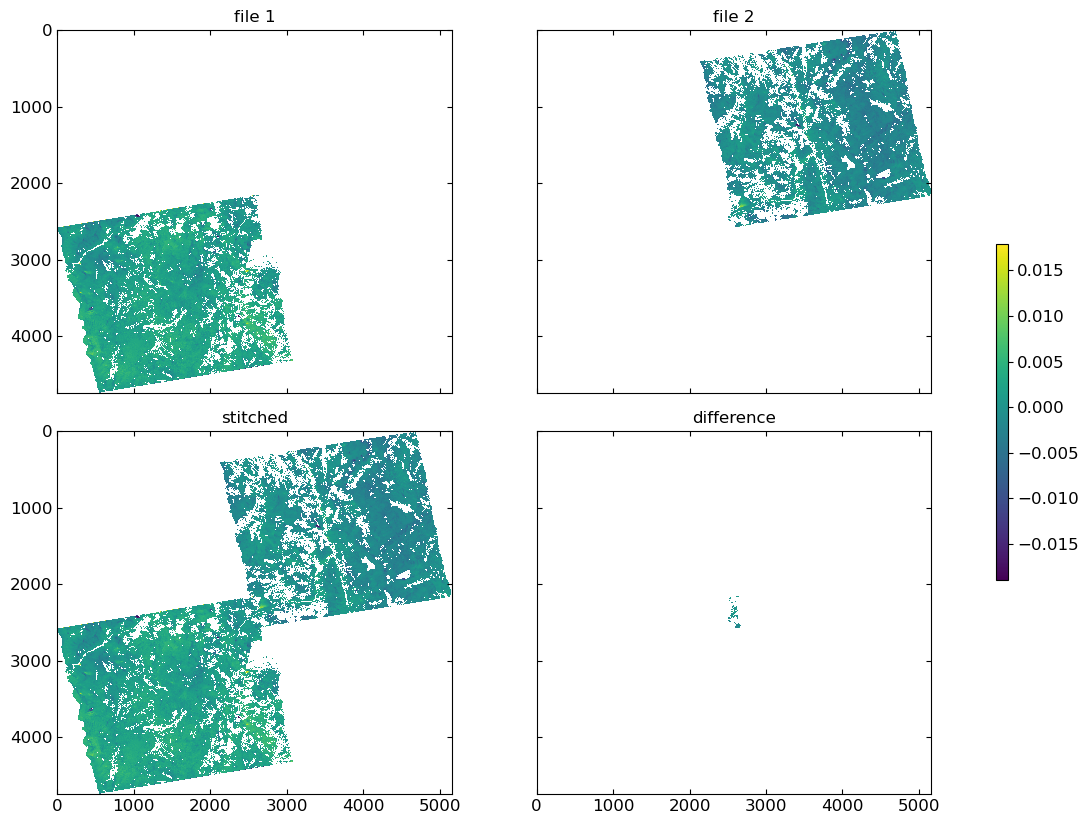

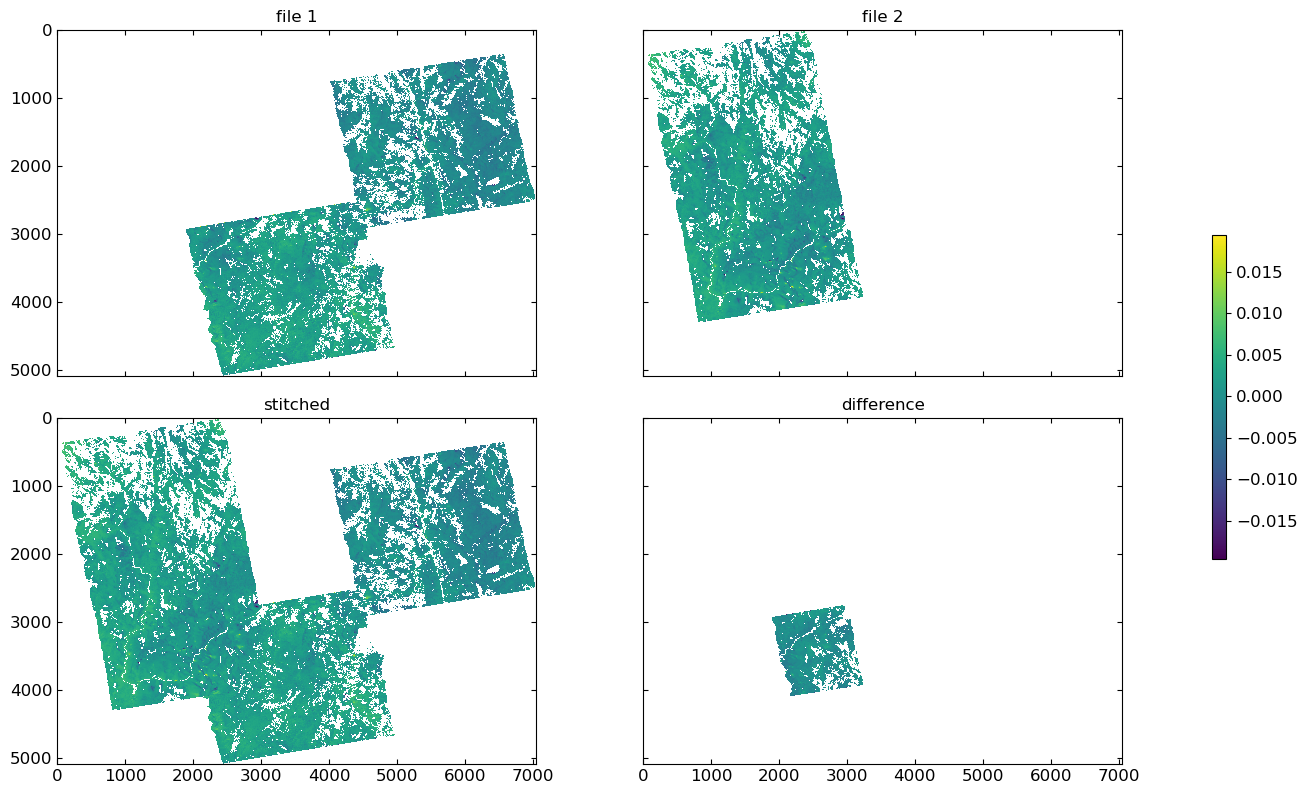

In [7]:
# file paths
vel_files = [os.path.join(proj_dir, x, 'mintpy/geo/geo_velocityInterseismic_msk.h5') for x in ds_names]
out_file = os.path.join(proj_dir, f'velocity/vel_interseismic_{suffix}.h5')

# run
cmd = ' '.join(x for x in vel_files) + f' -o {out_file}'
if ut.run_or_skip(out_file, in_file=vel_files) == 'run':
    image_stitch.main(cmd.split())

### C. Plot

view.py /Users/yunjunz/data/china/jinsha/velocity/vel_interseismic_alos2_asc.h5 velocity --dem /Users/yunjunz/data/china/jinsha/DEM/copernicus.h5 --shade-exag 0.1 -v -2 2 --lalo-label --ylabel-rot 90 --scalebar 0.25 0.85 0.05 --scalebar-pad 0.03 --cbar-nbins 4 --ref-size 4 --notitle --noverbose -o /Users/yunjunz/data/china/jinsha/velocity/pic/vel_interseismic_alos2_asc.png


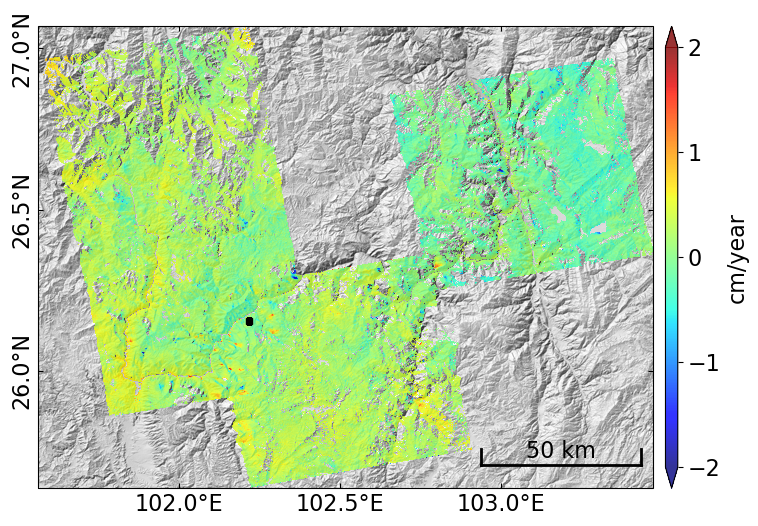

In [9]:
# file paths
vel_file = os.path.join(proj_dir, f'velocity/vel_interseismic_{suffix}.h5')
png_file = os.path.join(proj_dir, f'velocity/pic/vel_interseismic_{suffix}.png')

# run view.py
cmd = f'{vel_file} velocity --dem {dem_file} --shade-exag 0.1 '
cmd += '-v -2 2 --lalo-label --ylabel-rot 90 --scalebar 0.25 0.85 0.05 --scalebar-pad 0.03 --cbar-nbins 4 --ref-size 4 '
cmd += f'--notitle --noverbose -o {png_file} '
view.main(cmd.split())